## **1.Animate bivariate normal distribution**

In [1]:
# Importing the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

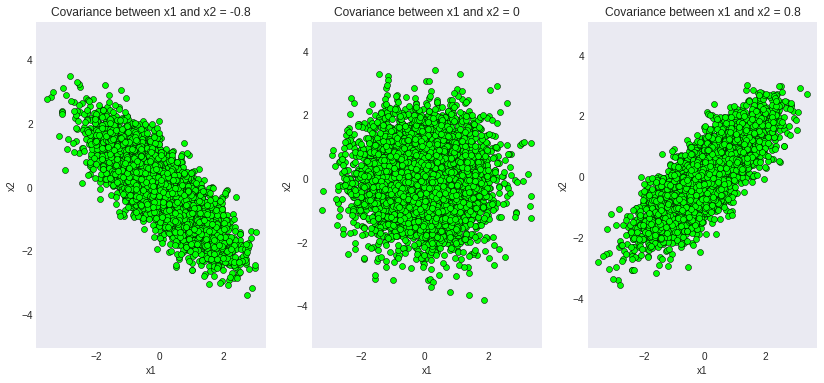

In [2]:
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=14,6
 
# Initializing the random seed
random_seed=1000
 
# List containing the variance
# covariance values
cov_val = [-0.8, 0, 0.8]
 
# Setting mean of the distributino to
# be at (0,0)
mean = np.array([0,0])
 
# Iterating over different covariance
# values
for idx, val in enumerate(cov_val):
    plt.subplot(1,3,idx+1)
     
    # Initializing the covariance matrix
    cov = np.array([[1, val], [val, 1]])
     
    # Generating a Gaussian bivariate distribution
    # with given mean and covariance matrix
    distr = multivariate_normal(cov = cov, mean = mean,
                                seed = random_seed)
     
    # Generating 5000 samples out of the
    # distribution
    data = distr.rvs(size = 5000)
     
    # Plotting the generated samples
    plt.plot(data[:,0],data[:,1], 'o', c='lime',
             markeredgewidth = 0.5,
             markeredgecolor = 'black')
    plt.title(f'Covariance between x1 and x2 = {val}')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.axis('equal')
     
plt.show()

We can see that the code’s output has successfully met our theoretical proofs! Note that the value 0.8 was taken just for convenience purposes. The reader can play around with different magnitudes of covariance and expect consistent results.

3D view of the probability density function: Now we can move over to one of the most interesting and characteristic aspects of the bivariate Gaussian distribution, the density function! The density function is responsible for the characteristic bell shape of the distribution.

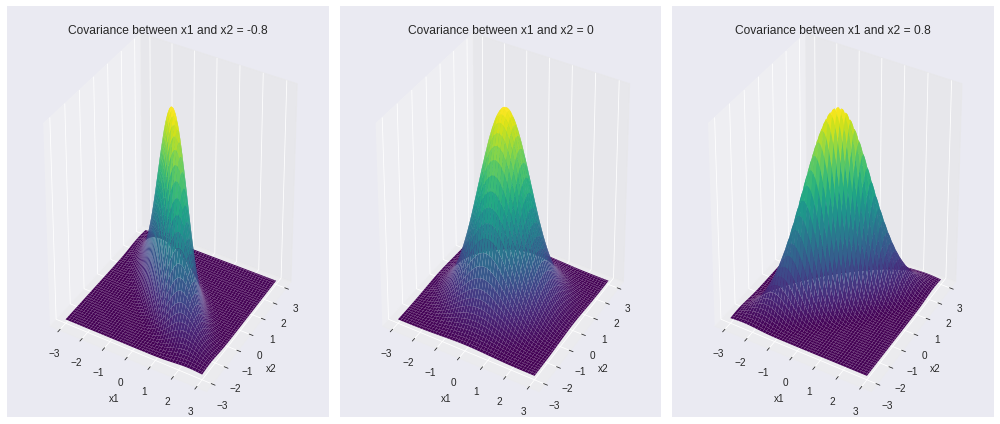

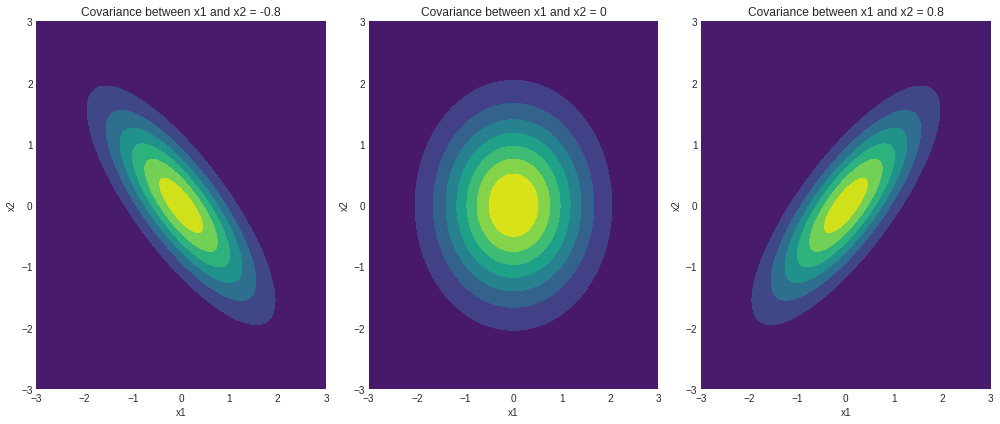

In [1]:
# Importing the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
 
 
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=14,6
fig = plt.figure()
 
# Initializing the random seed
random_seed=1000
 
# List containing the variance
# covariance values
cov_val = [-0.8, 0, 0.8]
 
# Setting mean of the distributino
# to be at (0,0)
mean = np.array([0,0])
 
# Storing density function values for
# further analysis
pdf_list = []
 
# Iterating over different covariance values
for idx, val in enumerate(cov_val):
     
    # Initializing the covariance matrix
    cov = np.array([[1, val], [val, 1]])
     
    # Generating a Gaussian bivariate distribution
    # with given mean and covariance matrix
    distr = multivariate_normal(cov = cov, mean = mean,
                                seed = random_seed)
     
    # Generating a meshgrid complacent with
    # the 3-sigma boundary
    mean_1, mean_2 = mean[0], mean[1]
    sigma_1, sigma_2 = cov[0,0], cov[1,1]
     
    x = np.linspace(-3*sigma_1, 3*sigma_1, num=100)
    y = np.linspace(-3*sigma_2, 3*sigma_2, num=100)
    X, Y = np.meshgrid(x,y)
     
    # Generating the density function
    # for each point in the meshgrid
    pdf = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])
     
    # Plotting the density function values
    key = 131+idx
    ax = fig.add_subplot(key, projection = '3d')
    ax.plot_surface(X, Y, pdf, cmap = 'viridis')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(f'Covariance between x1 and x2 = {val}')
    pdf_list.append(pdf)
    ax.axes.zaxis.set_ticks([])
 
plt.tight_layout()
plt.show()
 
# Plotting contour plots
for idx, val in enumerate(pdf_list):
    plt.subplot(1,3,idx+1)
    plt.contourf(X, Y, val, cmap='viridis')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(f'Covariance between x1 and x2 = {cov_val[idx]}')
plt.tight_layout()
plt.show()

## **2.Implement from scratch a sampling method to draw samples from a multivariate Normal (MVN) distribution in JAX.**

# Multivariate Normal Distribution

A random vector X = ( X 1 , , X d ) has a multivariate normal distribution if every linear combination

d ∑ i = 1

a i X i , a i ∈ R is normally distributed.

The multivariate normal distribution has a joint probability density given by

p ( x | m , K 0 ) = ( 2 π ) − d / 2 | K 0 | − 1 / 2 exp ( − 1 2 ( x − m ) T K 0 − 1 ( x − m ) ) ,

where m d is the mean vector and K 0 M d ( ) is the (symmetric, positive definite) covariance matrix.

In [3]:
# importing libraries

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


In [3]:
# Define dimension.
d = 2
# Set mean vector.
m = np.array([1, 2]).reshape(2, 1)
# Set covariance function.
K_0 = np.array([[2, 1],
                [1, 2]])
# compute the eigenvalues of k0
# Eigenvalues covariance function.
np.linalg.eigvals(K_0)


array([3., 1.])

We see that K 0 is indeed positive definite.




Sampling Process

We want to compute the Cholesky decomposition of the covariance matrix K 0 . That is, we want to find a lower triangular matrix L M d ( ) such that K 0 = L L T .

In [4]:
# Define epsilon.
epsilon = 0.0001
# Add small pertturbation.
K = K_0 + epsilon*np.identity(d)
# Cholesky decomposition.
L = np.linalg.cholesky(K)
L

array([[1.41424892, 0.        ],
       [0.7070891 , 1.2247959 ]])

verify the desired property:

In [5]:
np.dot(L, np.transpose(L))

array([[2.0001, 1.    ],
       [1.    , 2.0001]])

Generate Independent Samples u ∼ N ( 0 , I )


Compute x = m + L u The variable x = m + L u has a multivariate normal distribution since is a linear combination of independent normally distributed variables. Moreover,

E [ x ] = E [ m + L u ] = m + L E [ u ] = m

and

E [ x x T ] = E [ m m T ] + E [ m u T L T ] + E [ L u m T ] + E [ L u u T L T ] = | | m 2 | | + L E [ u u T ] L T = ∥ m ∥ 2 + K

hence, (E[(x-m)(xT-mT)] = K).

In [6]:
n = 10000
u = np.random.normal(loc=0, scale=1, size=d*n).reshape(d, n)
x = m + np.dot(L, u)

Plot Distribution

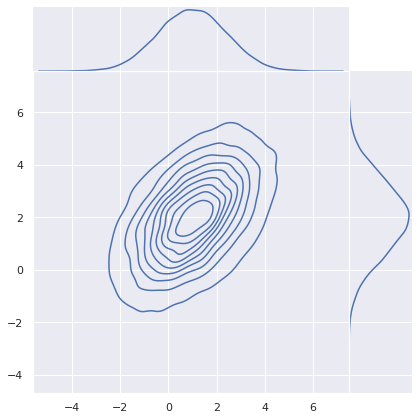

In [7]:
# plotting the density function.
sns.jointplot(x=x[0], y=x[1], kind="kde", space=0);

#Using Numpy Sampler





# Numpy has a build in multivariate normal sampling function

In [8]:
z = np.random.multivariate_normal(mean=m.reshape(d,), cov=K, size=n)
y = np.transpose(z)

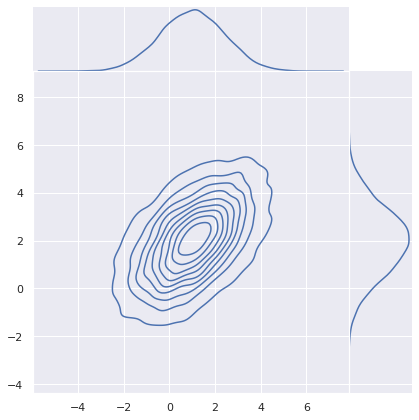

In [9]:
# Plot density function.
sns.jointplot(x=y[0], y=y[1], kind="kde", space=0);


Sums of Normal Random Variables need not be Normal

*Let *
Z 1 N ( 0 , 1 ) and define Z 2 := ( Z 1 ) Z 1 . Then, Z 1 + Z 2 is not normally distributed.

In [10]:
z_1 = np.random.normal(loc=0, scale=1, size=n)
z = np.random.normal(loc=0, scale=1, size=n)
z_2 = np.sign(z)*z_1

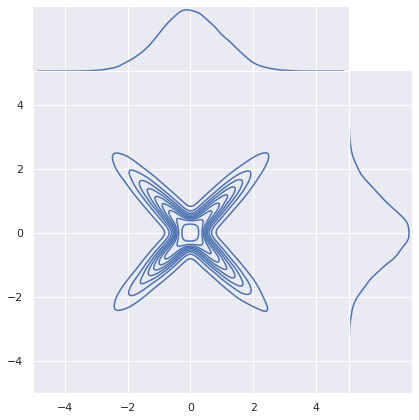

In [11]:
sns.jointplot(x=z_1, y=z_2, kind="kde", space=0);


# **4. Bayesian Linear Regression from scratch with BlackJAX**

# STEP:1: PROBABILISTIC MODEL(Bayesian Linear Regression model)

In [12]:
from scipy.stats import multivariate_normal
import numpy as np

class BayesianLinearRegression:
    """ Bayesian linear regression
    
    Args:
        prior_mean: Mean values of the prior distribution (m_0)
        prior_cov: Covariance matrix of the prior distribution (S_0)
        noise_var: Variance of the noise distribution
    """
    
    def __init__(self, prior_mean: np.ndarray, prior_cov: np.ndarray, noise_var: float):
        self.prior_mean = prior_mean[:, np.newaxis] # column vector of shape (1, d)
        self.prior_cov = prior_cov # matrix of shape (d, d)
        # We initalize the prior distribution over the parameters using the given mean and covariance matrix
        # In the formulas above this corresponds to m_0 (prior_mean) and S_0 (prior_cov)
        self.prior = multivariate_normal(prior_mean, prior_cov)
        
        # We also know the variance of the noise
        self.noise_var = noise_var # single float value
        self.noise_precision = 1 / noise_var
        
        # Before performing any inference the parameter posterior equals the parameter prior
        self.param_posterior = self.prior
        # Accordingly, the posterior mean and covariance equal the prior mean and variance
        self.post_mean = self.prior_mean # corresponds to m_N in formulas
        self.post_cov = self.prior_cov # corresponds to S_N in formulas
        
        
# Let's make sure that we can initialize our model
prior_mean = np.array([0, 0])
prior_cov = np.array([[0.5, 0], [0, 0.5]])
noise_var = 0.2
blr = BayesianLinearRegression(prior_mean, prior_cov, noise_var)

#GENERATING A DATASET

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

def compute_function_labels(slope: float, intercept: float, noise_std_dev: float, data: np.ndarray) -> np.ndarray:
    """
    Compute target values given function parameters and data.
    
    Args:
        slope: slope of the function (theta_1)
        intercept: intercept of the function (theta_0)
        data: input feature values (x)
        noise_std_dev: standard deviation of noise distribution (sigma)
        
    Returns:
        target values, either true or corrupted with noise
    """
    n_samples = len(data)
    if noise_std_dev == 0: # Real function
        return slope * data + intercept
    else: # Noise corrupted
        return slope * data + intercept + np.random.normal(0, noise_std_dev, n_samples)

In [14]:
# Set random seed to ensure reproducibility
seed = 42
np.random.seed(seed)

# Generate true values and noise corrupted targets
n_datapoints = 1000
intercept = -0.7
slope = 0.9
noise_std_dev = 0.5
noise_var = noise_std_dev**2
lower_bound = -1.5
upper_bound = 1.5

# Generate dataset
features = np.random.uniform(lower_bound, upper_bound, n_datapoints)
labels = compute_function_labels(slope, intercept, 0., features)
noise_corrupted_labels = compute_function_labels(slope, intercept, noise_std_dev, features)

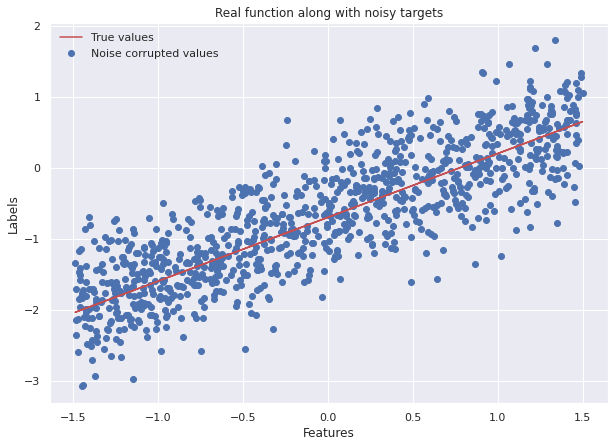

In [15]:
# Plot the dataset
plt.figure(figsize=(10,7))
plt.plot(features, labels, color='r', label="True values")
plt.scatter(features, noise_corrupted_labels, label="Noise corrupted values")
plt.xlabel("Features")
plt.ylabel("Labels")
plt.title("Real function along with noisy targets")
plt.legend();